<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Clusteriza%C3%A7%C3%A3o_com_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')
clientes = pd.read_csv("drive/MyDrive/digio_hackathon/clientes.csv", sep=';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
clientes.head(2)

,safra,uf,nascimento,genero_biologico,renda_presumida,renda_declarada,limite_maximo,limite_global,reg_metropolitana,sistema_operacional,operadora_tim,operadora_claro,operadora_oi,operadora_vivo,operadora_nextel,operadora_others,id
0,201706,AL,1993-06-06,M,1200.0,1800.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1844674417714159308
1,201702,MT,1993-11-23,M,750.0,1444.0,750.0,750.0,NaN,iOS,0.0,1.0,0.0,0.0,0.0,0.0,691752913106883469


In [58]:
cluster = clientes.copy()
cluster_1 = clientes.loc[:, ['nascimento', 'renda_presumida', 'renda_declarada', 'limite_global', 'limite_maximo']].loc[(clientes['safra'] == 201912)]
cluster_2 = clientes.loc[:, ['nascimento', 'renda_presumida', 'renda_declarada', 'limite_global', 'limite_maximo']].loc[(clientes['safra'] == 201911)]
cluster_3 = clientes.loc[:, ['nascimento', 'renda_presumida', 'renda_declarada', 'limite_global', 'limite_maximo']].loc[(clientes['safra'] == 201910)]

cluster_full = [cluster_1, cluster_2, cluster_3]
cluster_full = pd.concat(cluster_full)                                         

In [44]:
cluster.shape

(0, 5)

In [60]:
pd.to_datetime(cluster_full['nascimento'])

def calcular_idade(dt_nasc):
  dt_nasc = datetime.strptime(dt_nasc, "%Y-%m-%d").date()
  today = date.today()
  return today.year - dt_nasc.year - ((today.month, today.day) < (dt_nasc.month, dt_nasc.day))

cluster_full['idade'] = cluster['nascimento'].apply(calcular_idade)

cluster_clean = cluster_full.copy()
cluster_clean = cluster_full.drop(columns=['nascimento'], axis=1)


In [61]:
cluster_clean.dropna(inplace=True)
cluster_clean.head(2)

,renda_presumida,renda_declarada,limite_global,limite_maximo,idade
70,1450.0,1450.0,620.0,620.0,25
87,1900.0,1900.0,700.0,700.0,21


In [93]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

X = cluster_clean.loc[:, ['renda_declarada', 'idade', 'limite_global']].values
y = cluster_clean.loc[:, ['limite_global']].values

k_means_2 = KMeans(n_clusters=2, init='random')
k_means_3 = KMeans(n_clusters=3, init='random')
k_means_4 = KMeans(n_clusters=4, init='random')
k_means_5 = KMeans(n_clusters=5, init='random')
k_means_6 = KMeans(n_clusters=6, init='random')
k_means_7 = KMeans(n_clusters=7, init='random')
k_means_8 = KMeans(n_clusters=8, init='random')

k_means_2.fit(X)
k_means_3.fit(X)
k_means_4.fit(X)
k_means_5.fit(X)
k_means_6.fit(X)
k_means_7.fit(X)
k_means_8.fit(X)

labels_2 = k_means_2.labels_
labels_3 = k_means_3.labels_
labels_4 = k_means_4.labels_
labels_5 = k_means_5.labels_
labels_6 = k_means_6.labels_
labels_7 = k_means_7.labels_
labels_8 = k_means_8.labels_

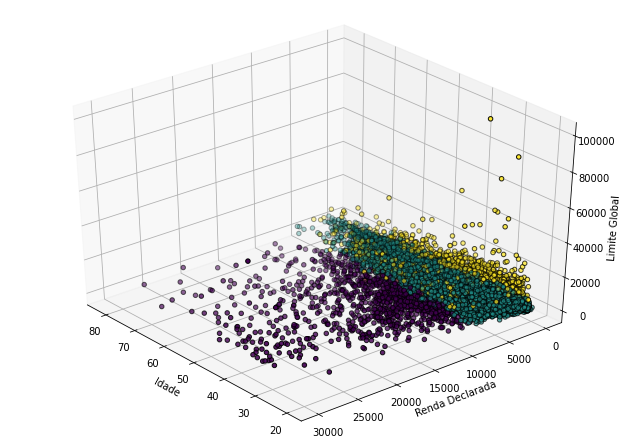

In [99]:
fignum = 1
fig = plt.figure(fignum, figsize=(9, 6))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=35, azim=140)
ax.scatter(X[:, 1], X[:, 2], X[:, 0], c=labels_3.astype(float), edgecolor='k')

ax.set_xlabel("Idade")
ax.set_ylabel("Renda Declarada")
ax.set_zlabel("Limite Global")
ax.dist = 10

fig.show()

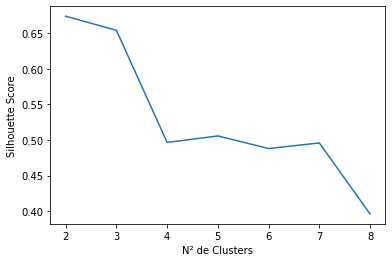

In [114]:
from sklearn.metrics import silhouette_score

n_2 = silhouette_score(X, labels_2)
n_3 = silhouette_score(X, labels_3)
n_4 = silhouette_score(X, labels_4)
n_5 = silhouette_score(X, labels_5)
n_6 = silhouette_score(X, labels_6)
n_7 = silhouette_score(X, labels_7)
n_8 = silhouette_score(X, labels_8)

x = np.arange(2, 9, 1)
y = (n_2, n_3, n_4, n_5, n_6, n_7, n_8)

plt.xlabel('N² de Clusters')
plt.ylabel("Silhouette Score")
plt.plot(x, y)
plt.show()